In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import mean_absolute_error,mean_squared_error
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy as sp

In [2]:
df=pd.read_csv("C:/Users/ADMIN/Pictures/Python/Zeetcode/Redu/forestfires.csv")
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
pd.DataFrame(df["area"].unique())
print(df["area"].nunique())

251


In [3]:
print("Shape",df.shape)
df.isnull().sum()

Shape (517, 13)


X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [4]:

y=df["area"]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
#Split cat and numeric 
numericfeat=df.select_dtypes(include=np.number)
catfeat=df.select_dtypes(exclude=np.number)
#238,415,479- Area Outliers
X=numericfeat.drop("area",axis=1)

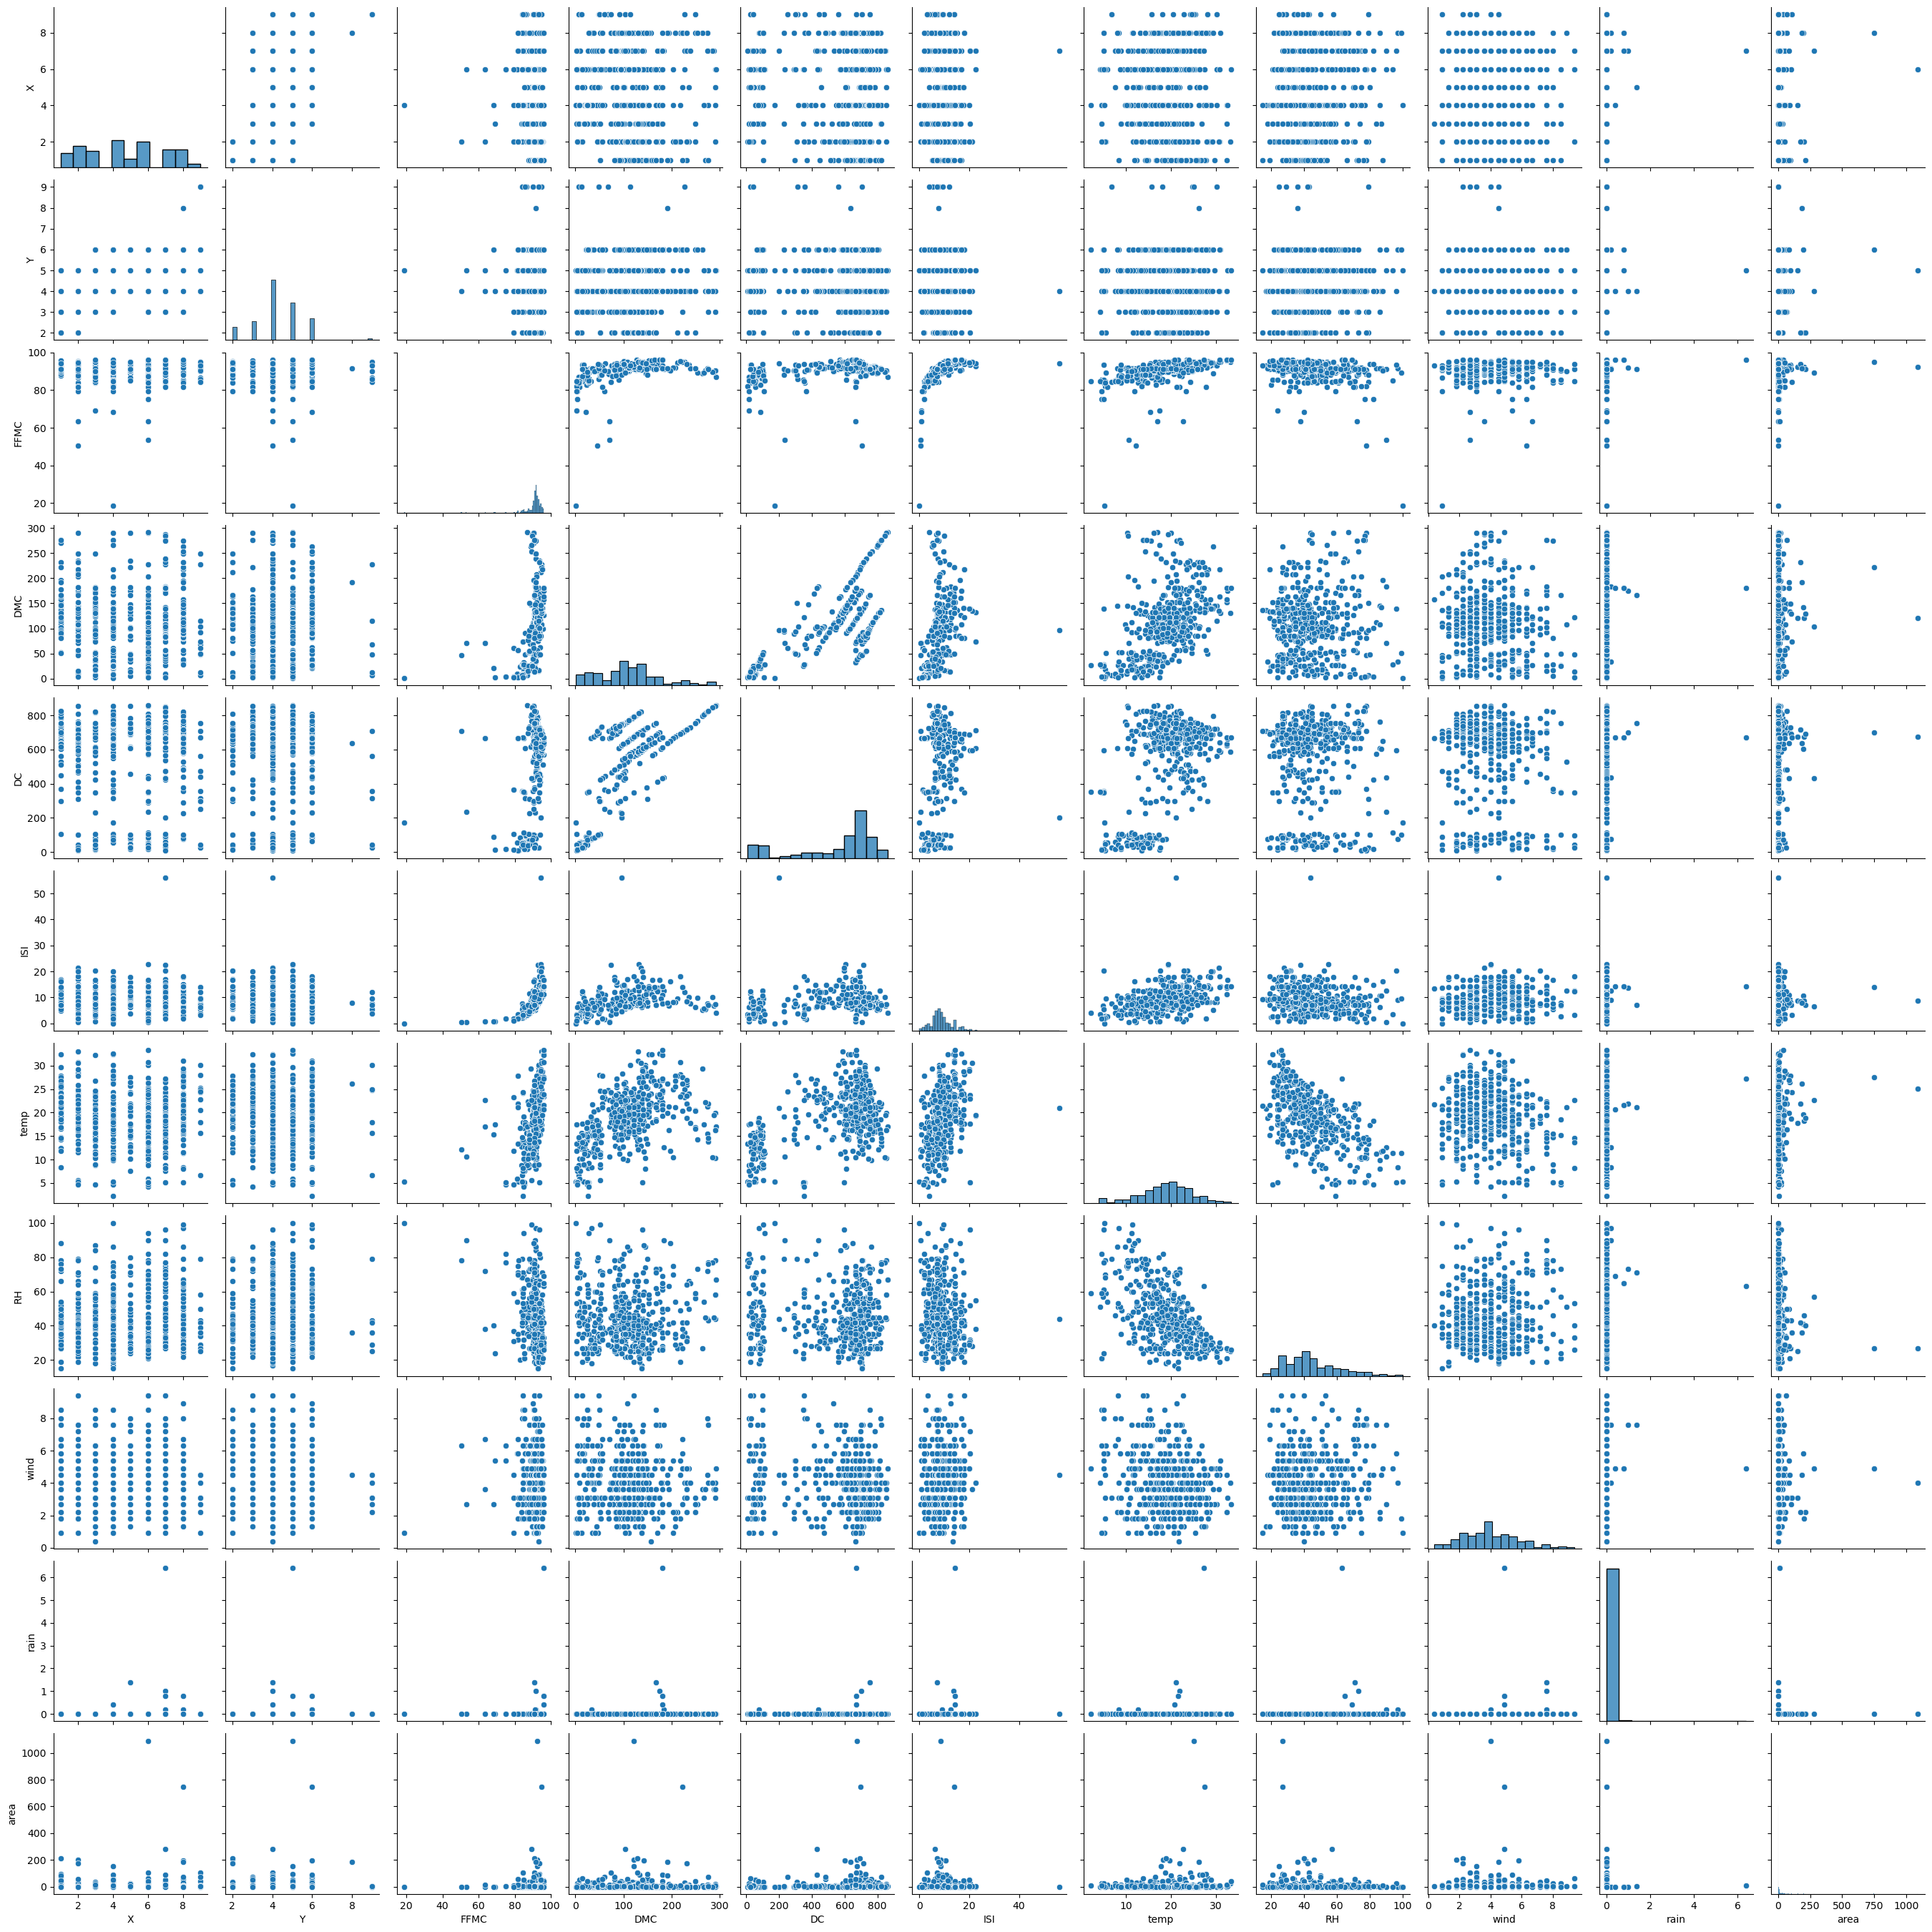

In [8]:
sns.pairplot(df)

<AxesSubplot:>

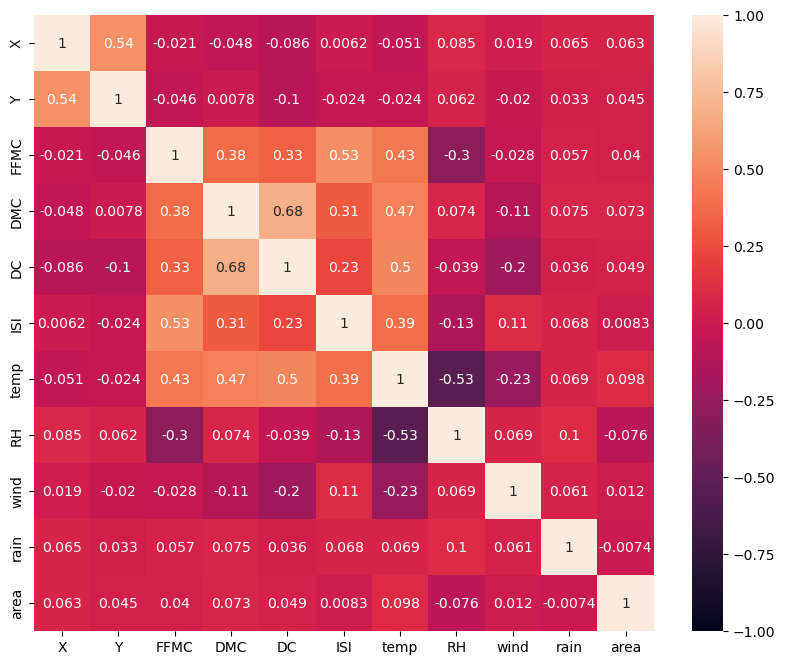

In [8]:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ADMIN\anaconda3\lib\si

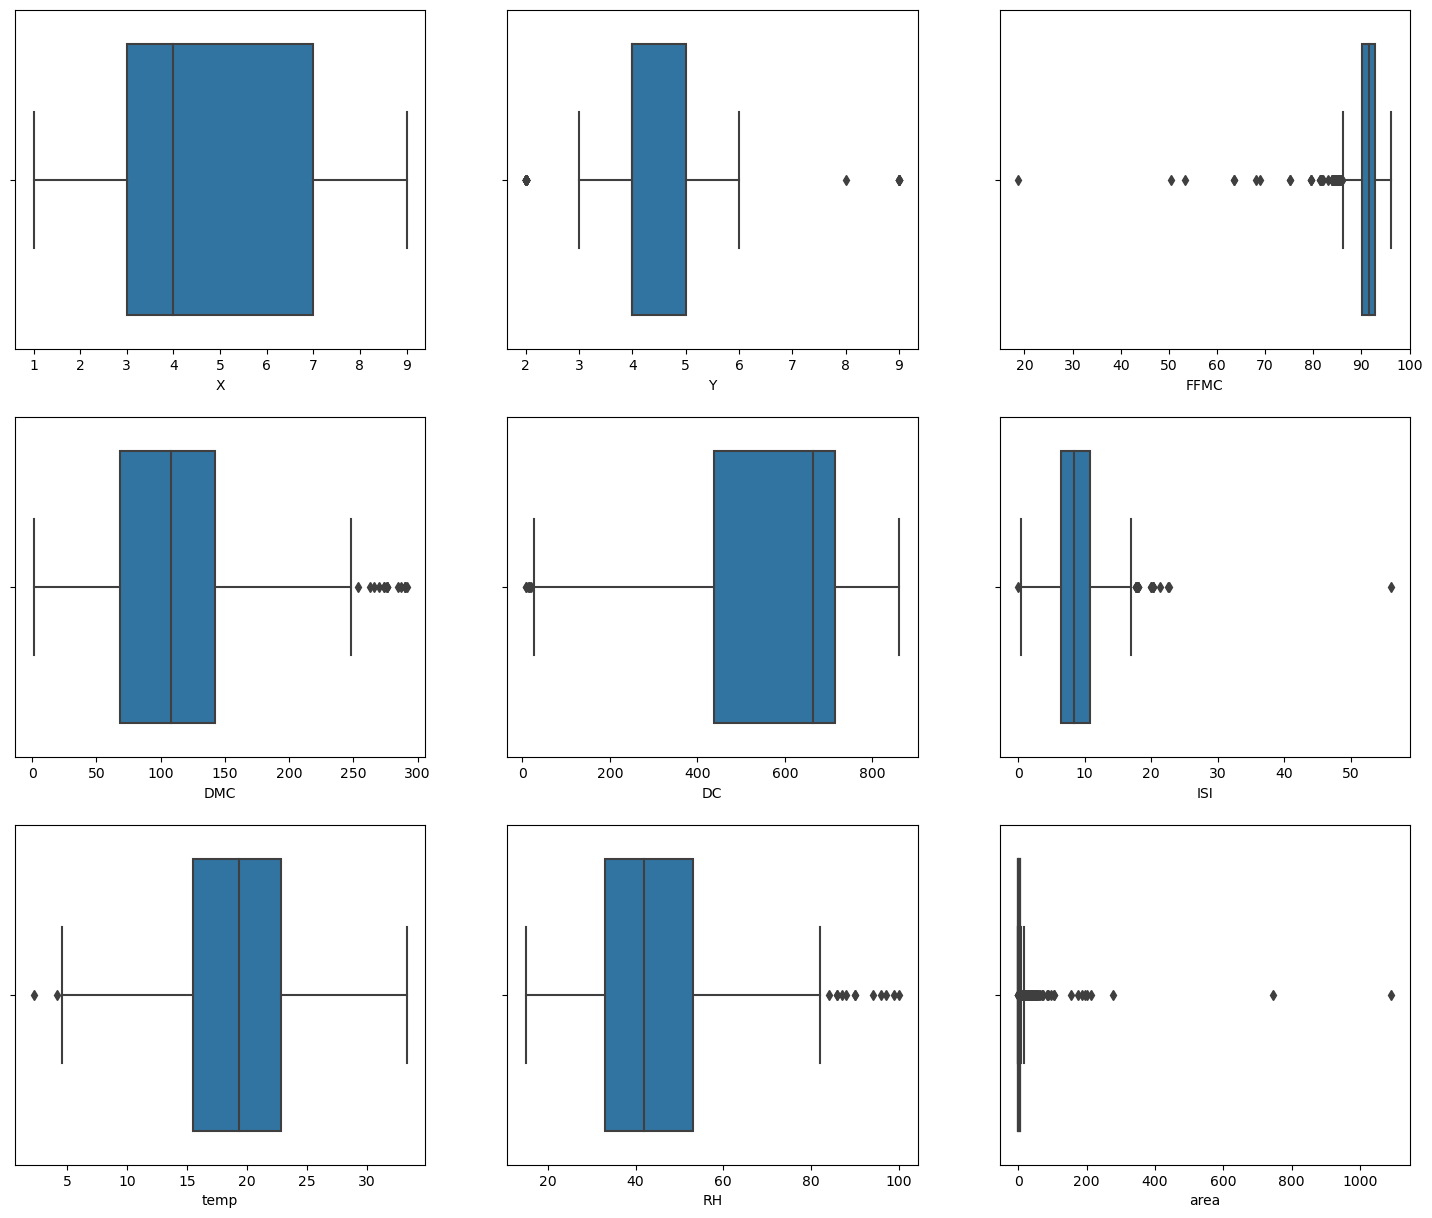

In [9]:


plt.figure(figsize=(18,15))

plt.subplot(3,3,1)

sns.boxplot(df['X'])
plt.subplot(3,3,2)

sns.boxplot(df["Y"])
plt.subplot(3,3,3)

sns.boxplot(df['FFMC'])
plt.subplot(3,3,4)

sns.boxplot(df['DMC'])
plt.subplot(3,3,5)

sns.boxplot(df['DC'])
plt.subplot(3,3,6)

sns.boxplot(df['ISI'])
plt.subplot(3,3,7)

sns.boxplot(df['temp'])
plt.subplot(3,3,8)

sns.boxplot(df['RH'])
plt.subplot(3,3,9)

sns.boxplot(df['wind'])
plt.subplot(3,3,9)

sns.boxplot(df["rain"])
plt.subplot(3,3,9)

sns.boxplot(df["area"])
plt.show();


In [10]:
#Normality Check :

for i in numericfeat.columns:
    if numericfeat[i].skew()>=-0.50 and numericfeat[i].skew()<=0.50:
              print("Normally Distrubuted",i,numericfeat[i].skew())
    else:
              print(" Skewed ",i,numericfeat[i].skew())
    

Normally Distrubuted X 0.036245821612869086
Normally Distrubuted Y 0.41729624593033865
 Skewed  FFMC -6.575605977178827
 Skewed  DMC 0.5474977944865835
 Skewed  DC -1.1004451245649132
 Skewed  ISI 2.5363252664156875
Normally Distrubuted temp -0.331172237347285
 Skewed  RH 0.8629040078552522
 Skewed  wind 0.5710011270000588
 Skewed  rain 19.816343982813166
 Skewed  area 12.846933533934868


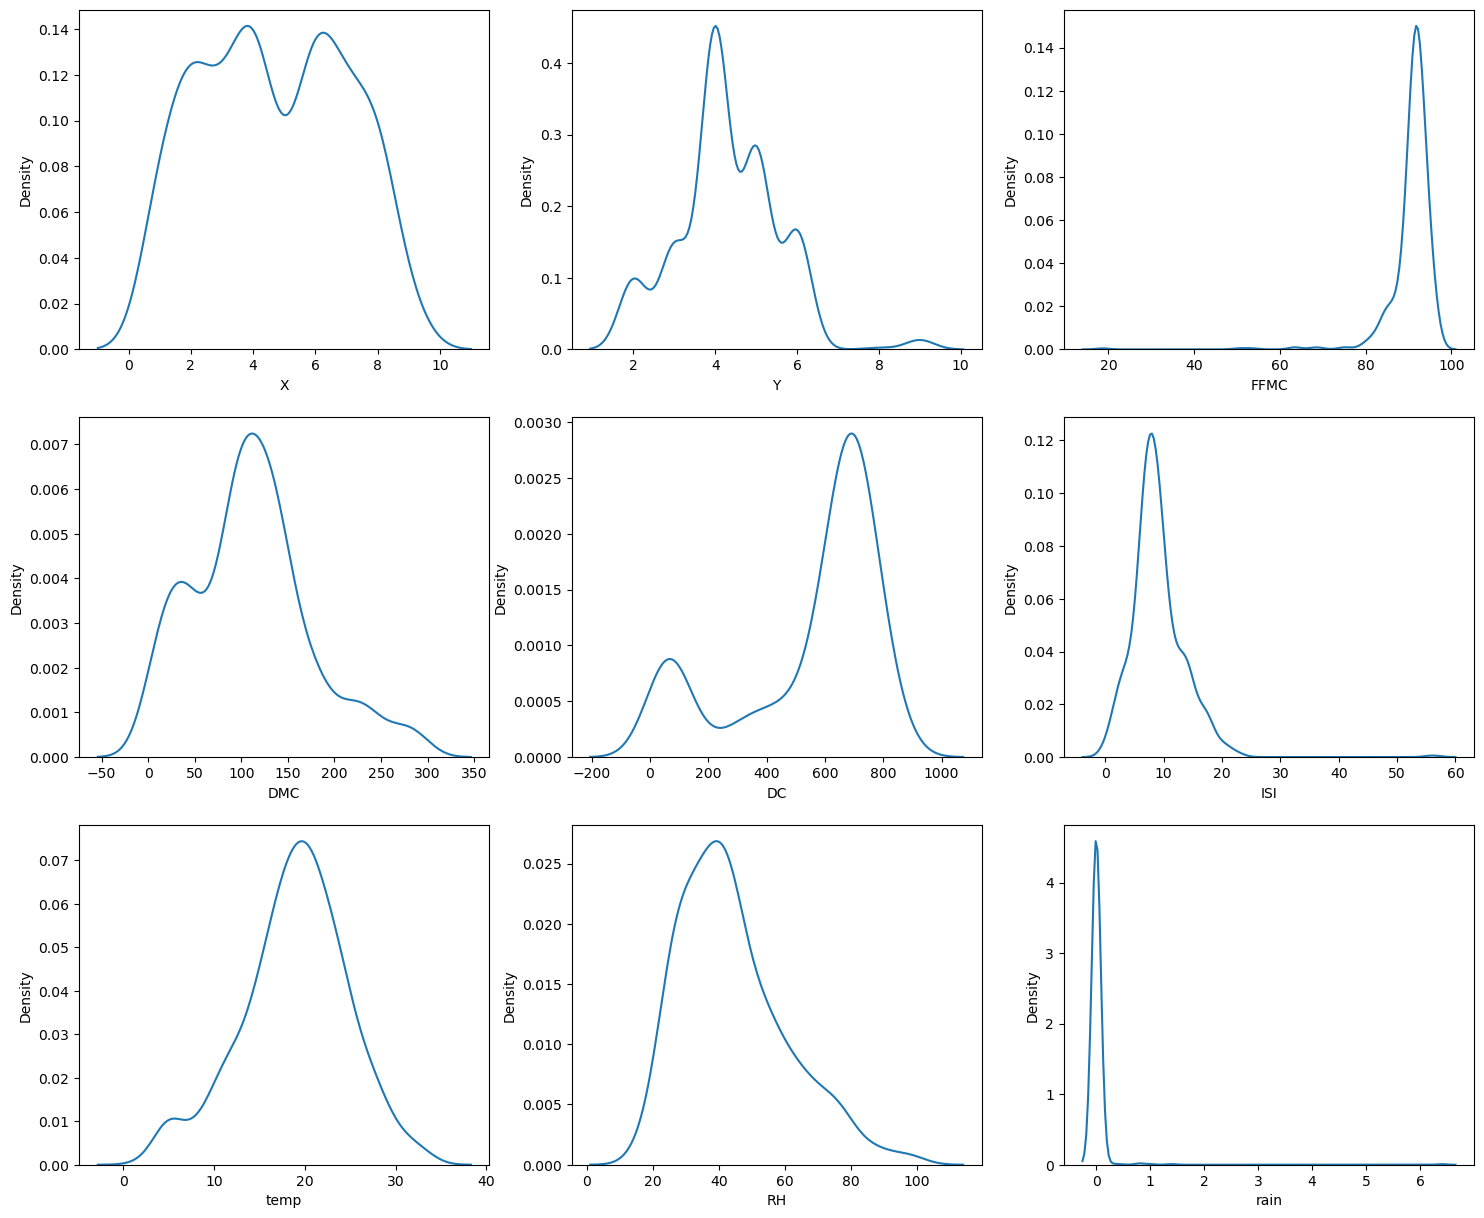

In [11]:
plt.figure(figsize=(18,15))

plt.subplot(3,3,1)

sns.kdeplot(df['X'])

plt.subplot(3,3,2)

sns.kdeplot(df["Y"])
plt.subplot(3,3,3)

sns.kdeplot(df['FFMC'])
plt.subplot(3,3,4)

sns.kdeplot(df['DMC'])
plt.subplot(3,3,5)

sns.kdeplot(df['DC'])
plt.subplot(3,3,6)

sns.kdeplot(df['ISI'])
plt.subplot(3,3,7)

sns.kdeplot(df['temp'])
plt.subplot(3,3,8)

sns.kdeplot(df['RH'])
plt.subplot(3,3,9)

sns.kdeplot(df['rain'])
plt.subplot(3,3,9)


plt.show();



In [12]:

#Linearity Check 
model_ = sm.OLS(y,X)
fited = model_.fit()
print(fited.summary())

                                 OLS Regression Results                                
Dep. Variable:                   area   R-squared (uncentered):                   0.060
Model:                            OLS   Adj. R-squared (uncentered):              0.041
Method:                 Least Squares   F-statistic:                              3.235
Date:                Wed, 03 May 2023   Prob (F-statistic):                    0.000465
Time:                        19:42:15   Log-Likelihood:                         -2874.8
No. Observations:                 517   AIC:                                      5770.
Df Residuals:                     507   BIC:                                      5812.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [13]:

lin = sm.stats.diagnostic.linear_rainbow(res=fited)[1]
if(lin>0.05):
    print('Its satisfies linear condition')
else:
    print('Non Linearity is there')
    

Its satisfies linear condition


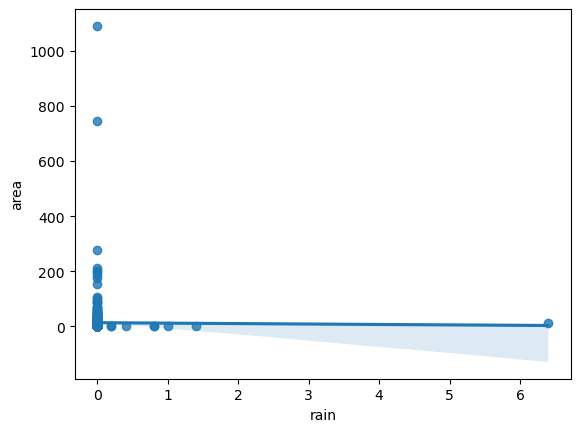

In [14]:
sns.regplot(x=df['rain'],y=df['area']);     


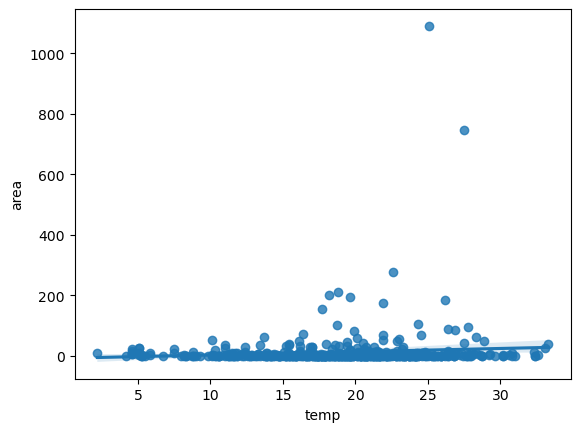

In [15]:
sns.regplot(x=df['temp'],y=df['area']);#no relation

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

In [17]:
Lr=LinearRegression()
LRmodel=Lr.fit(X_train,y_train)
prd=LRmodel.predict( X_test)
_ansdf=pd.DataFrame()
_ansdf["Predict"]=prd
_ansdf["Actual"]=np.array(y_test)
_ansdf["Resedual"]=np.array(y_test-prd)
_ansdf

,Predict,Actual,Resedual
0,14.077551,27.35,13.272449
1,4.231864,0.00,-4.231864
2,14.933079,2.18,-12.753079
3,17.459345,88.49,71.030655
4,14.391812,2.69,-11.701812
...,...,...,...
151,17.077471,0.00,-17.077471
152,16.507789,19.23,2.722211
153,0.837001,0.00,-0.837001
154,18.162481,15.64,-2.522481


In [18]:
mean_absolute_error = mean_absolute_error(y_test,prd)
print(mean_absolute_error)

21.823427378397408


In [19]:
Mse = mean_squared_error(y_test,prd)
print(Mse)

8195.094449005452


In [20]:
RMSE = np.sqrt(Mse)
print(RMSE)

90.5267609550096


In [21]:

LRmodel.score(X_train,y_train)

0.031106305925610367

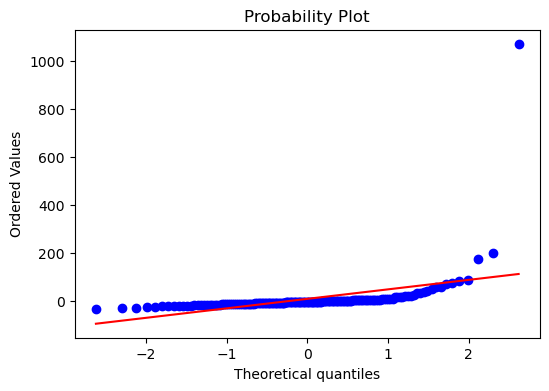

In [22]:
figg, a = plt.subplots(figsize=(6,4))
sp.stats.probplot(_ansdf["Resedual"],plot=a,fit=True)
plt.show();